# Запрос к базе данных и сохранение обработаной информации в csv-файл

In [19]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string)

query = ''' SELECT *
            FROM dash_visits
        '''

dash_visits = pd.io.sql.read_sql(query, con = engine)

In [6]:
#посмотрим файл
dash_visits

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27
...,...,...,...,...,...,...
30740,1071337,Юмор,Финансы,36-40,2019-09-24 18:57:00,2
30741,1071338,Юмор,Финансы,36-40,2019-09-24 19:00:00,1
30742,1071339,Юмор,Финансы,41-45,2019-09-24 18:54:00,1
30743,1071340,Юмор,Финансы,41-45,2019-09-24 18:56:00,1


In [7]:
#посмотрим файл
dash_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


Все данные есть, пропусков нет, типы данных в порядке.


In [8]:
#проверка на дубликаты
dash_visits.duplicated().sum()

0

Дубликатов нет

In [10]:
# просмотрим каждый столбец по информации
dash_visits['record_id'].nunique()

30745

все визиты уникальные

In [11]:
dash_visits['age_segment'].nunique()

6

In [13]:
dash_visits['age_segment'].value_counts()

18-25    7056
26-30    5875
31-35    5552
36-40    5105
41-45    3903
45+      3254
Name: age_segment, dtype: int64

всего 6 сегментов с количеством записей по ним

In [14]:
#посмотрим все темы источников
dash_visits['source_topic'].value_counts()

Семейные отношения    1822
Россия                1687
Знаменитости          1650
Полезные советы       1578
Путешествия           1563
Кино                  1505
Дети                  1459
История               1437
Семья                 1405
Одежда                1379
Здоровье              1243
Искусство             1228
Авто                  1077
Психология            1055
Сад и дача            1036
Политика              1024
Спорт                 1007
Сделай сам             995
Ремонт                 985
Деньги                 973
Еда                    912
Интерьеры              809
Строительство          758
Музыка                 750
Технологии             741
Финансы                667
Name: source_topic, dtype: int64

In [15]:
#посмотрим все темы карточек
dash_visits['item_topic'].value_counts()

Отношения             1536
Интересные факты      1535
Наука                 1505
Подборки              1456
Полезные советы       1424
Общество              1422
Россия                1385
История               1363
Семья                 1287
Путешествия           1247
Деньги                1234
Женщины               1230
Дети                  1229
Туризм                1206
Здоровье              1203
Красота               1193
Культура              1160
Юмор                  1129
Искусство             1119
Рассказы              1109
Психология            1056
Скандалы              1023
Знаменитости           976
Женская психология     914
Шоу                    804
Name: item_topic, dtype: int64

In [16]:
# выведем кол-во уникальных дат
dash_visits['dt'].sort_values().unique()

array(['2019-09-24T18:28:00.000000000', '2019-09-24T18:29:00.000000000',
       '2019-09-24T18:30:00.000000000', '2019-09-24T18:31:00.000000000',
       '2019-09-24T18:32:00.000000000', '2019-09-24T18:33:00.000000000',
       '2019-09-24T18:34:00.000000000', '2019-09-24T18:35:00.000000000',
       '2019-09-24T18:52:00.000000000', '2019-09-24T18:53:00.000000000',
       '2019-09-24T18:54:00.000000000', '2019-09-24T18:55:00.000000000',
       '2019-09-24T18:56:00.000000000', '2019-09-24T18:57:00.000000000',
       '2019-09-24T18:58:00.000000000', '2019-09-24T18:59:00.000000000',
       '2019-09-24T19:00:00.000000000'], dtype='datetime64[ns]')

Всего 17 дат уникальных

In [38]:
# период по которыи имеем данные по визитам
print('c', dash_visits['dt'].min(), 'по', dash_visits['dt'].max())

c 2019-09-24 18:28:00 по 2019-09-24 19:00:00


In [17]:
dash_visits['visits'].describe()

count    30745.000000
mean        10.089673
std         19.727601
min          1.000000
25%          1.000000
50%          3.000000
75%         10.000000
max        371.000000
Name: visits, dtype: float64

Есть очень большое кол-во визитов в 371 единицу. Посмотрим на выбросы.

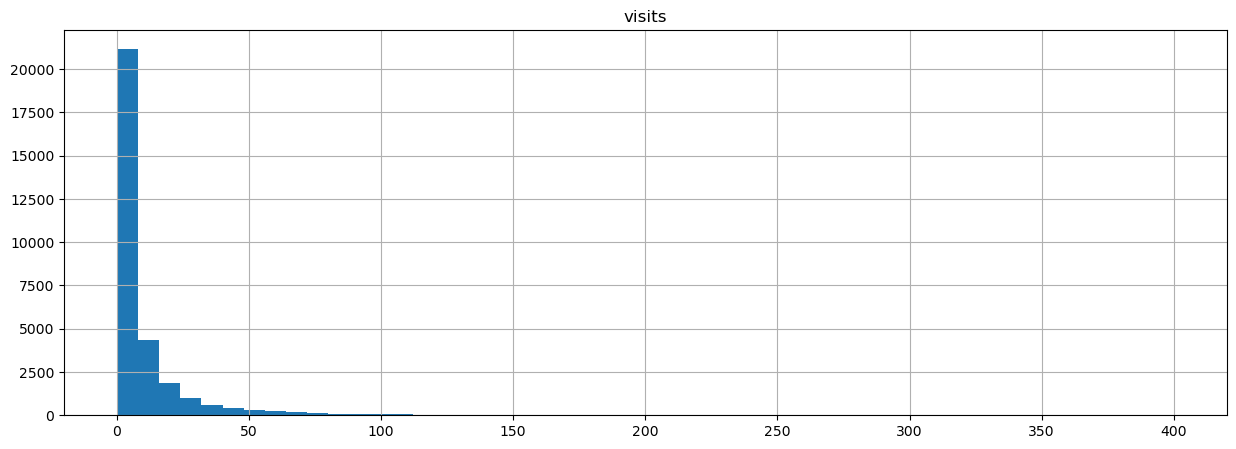

In [30]:
dash_visits.hist('visits', bins=50, range=(0, 400), figsize=(15,5));
plt.title('Кол-во визитов')
plt.show()

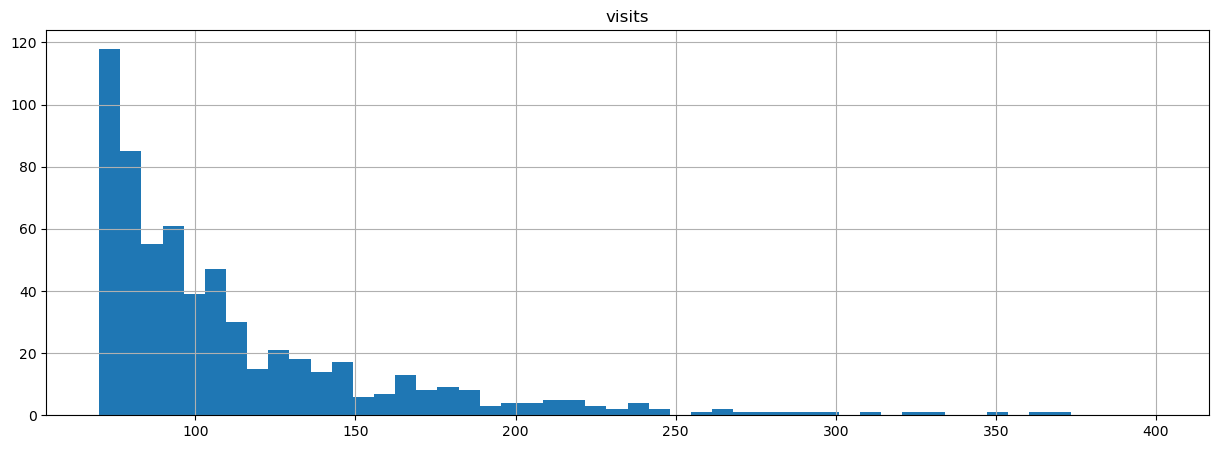

In [29]:
dash_visits.hist('visits', bins=50, range=(70,400), figsize=(15,5));
plt.title('Кол-во визитов')
plt.show()

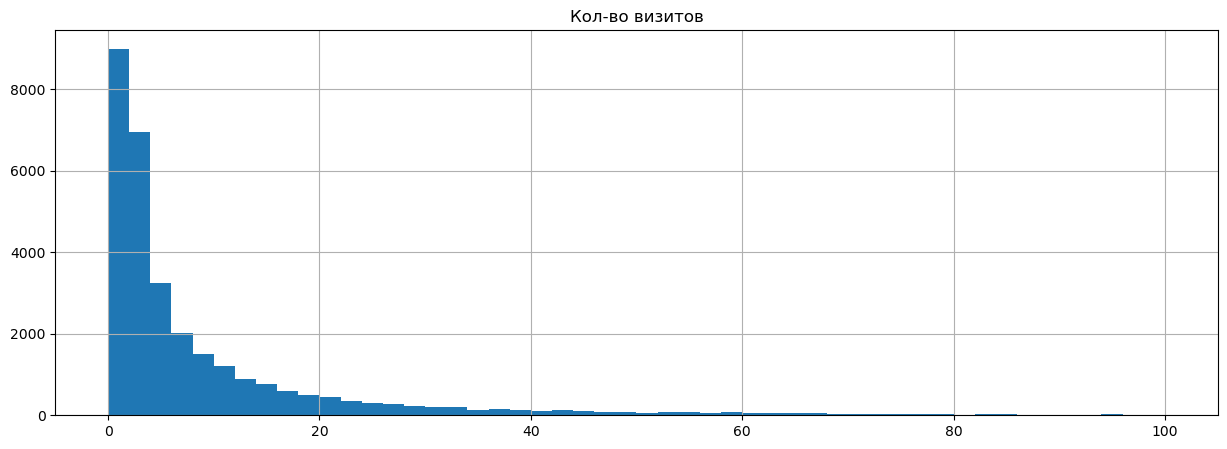

In [33]:
dash_visits.hist('visits', bins=50, range=(0,100), figsize=(15,5));
plt.title('Кол-во визитов')
plt.show()

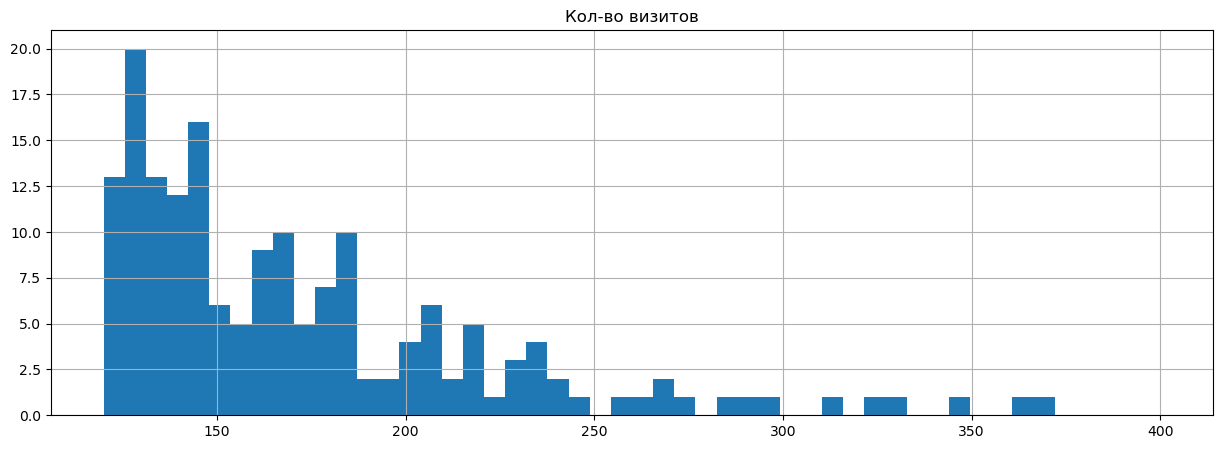

In [32]:
dash_visits['visits'].hist(bins=50, figsize=(15,5), range=(120,400));
plt.title('Кол-во визитов')
plt.show()

Графики показывают наличие аномальных визитов по количеству, но в целом их не много. Думаю оставлю все так как есть.

# Экспортирт данных в csv-файл

In [34]:
dash_visits.to_csv('dash_visits.csv', index=False)

In [39]:
visits = pd.read_csv('dash_visits.csv')
visits

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27
...,...,...,...,...,...,...
30740,1071337,Юмор,Финансы,36-40,2019-09-24 18:57:00,2
30741,1071338,Юмор,Финансы,36-40,2019-09-24 19:00:00,1
30742,1071339,Юмор,Финансы,41-45,2019-09-24 18:54:00,1
30743,1071340,Юмор,Финансы,41-45,2019-09-24 18:56:00,1


Все работает, экспорт удался.

Дашборд в Tableau: https://public.tableau.com/app/profile/marina.martynova/viz/AutomatizationProject/AutomatizationProject
    

Перезентация: https://goo.su/FDpUD

**Итого вывод:**

- Запрос к БД получился, файл выгрузили, изучили и экспортировали в csv для дальнейшей работы.
- Данные в файле проверили на дубликаты, на пропуски - все в порядке.
- Тажке выяснили, что есть по визитам небольшие выбросы, но они не большие и не сильно повлтияют на анализ данных.
- Данные в файле представлены с 2019-09-24 18:28:00 по 2019-09-24 19:00:00.
- Топ 5 популярных тем истоников: Семейные отношения 1822 визитов, Россия 1687, Знаменитости 1650, Полезные советы -1578, Путешествия - 1563 визита.
- Топ 5 популярных тем карточек: Отношения - 1536 визитов, Интересные факты - 1535, Наука - 1505, Подборки - 1456, Полезные советы - 1424
- Пользователи делятся на 6 сегментов, наиболее многолюдный сегмент 18-25 лет. Меньше всего визитов пользователей 45+.
